In [2]:
import os
import IPython

from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import librosa
import librosa.display

# import functions from scripts directory
import sys
sys.path.insert(1, '../../scripts/') # caution: path[0] is reserved for script path (or '' in REPL)
from read_wav import _read_wav_
from log_mel import mel_log, array2D_to_rgb

In [3]:
vec, tar_sr = _read_wav_("156_5b3_Pl_mc_AKGC417L.wav")
# plt.plot(vec)

#### Mel-Log

In [4]:
   
mel_dB = mel_log(vec, tar_sr)

mel_dB.shape

(50, 157)

### Reshape to RGB (H, W, 3) ndarray

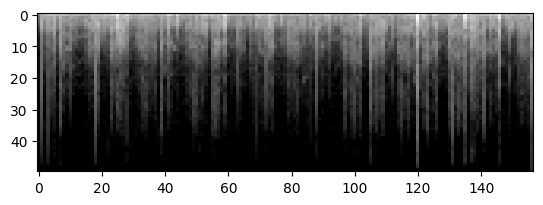

(50, 157, 3)

In [5]:
mel_dB_rgb = array2D_to_rgb(mel_dB)

# %matplotlib widget 
plt.imshow(mel_dB_rgb)
plt.show()

mel_dB_rgb.shape

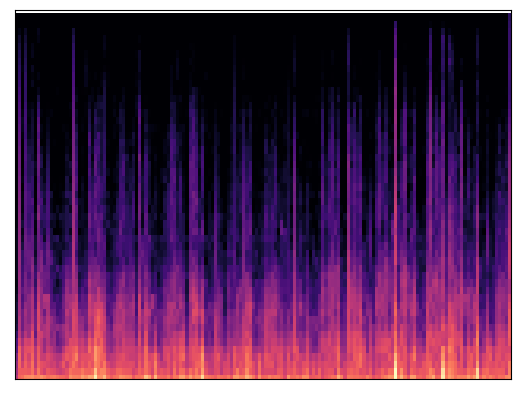

In [23]:
img = librosa.display.specshow(mel_dB,
                         sr=tar_sr,
                         fmax=tar_sr/2)

# plt.xlabel('Time')
# plt.ylabel('mel')
plt.ylim((0,50))

plt.savefig("test.png",  bbox_inches="tight", pad_inches=0)

# Viz

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

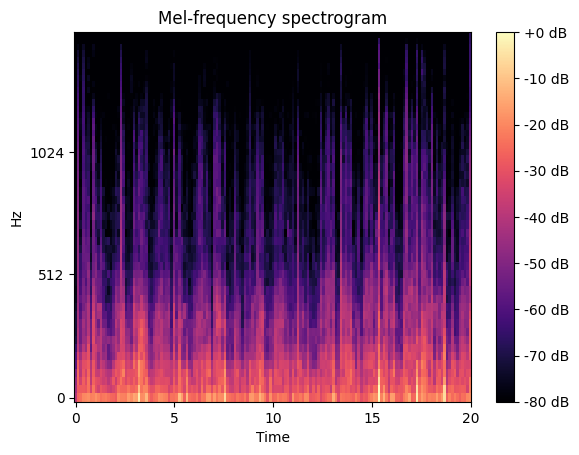

In [12]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mel_dB, x_axis='time',
                         y_axis='mel', sr=tar_sr,
                         fmax=tar_sr/2, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')